In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [43]:
# importing the data
data_from_csv = pd.read_csv("datasets/salary_data.csv", header=0)
data_from_csv.head()

,name,salary,years_experience
0,Keagan Klocko,92239.086870,4
1,Brandy Collier,61086.999212,2
2,Veronica Okuneva,47298.014663,3
3,Shana Beahan,59978.911117,3
4,Ayden Toy,81590.582658,2


In [44]:
# saperatting the data into x/inputs and y/outputs
x = data_from_csv.iloc[:, 2].values
y = data_from_csv.iloc[:, 1]
x.reshape(1, -1)

array([[ 4,  2,  3,  3,  2,  0,  7,  3,  6,  1,  2,  3,  1,  5,  1,  7,
         5,  4,  2,  2,  3,  2,  2,  1,  4,  2,  5,  2,  2,  3,  2,  2,
         4,  0,  4,  4,  3,  2,  6,  3,  4,  4,  4,  1,  3,  1,  7,  3,
         2,  3,  6,  4,  3,  3,  3,  3,  3,  3,  2,  4,  1,  4,  2,  1,
         1,  6,  3,  4,  3,  4,  4,  4,  2,  3,  2,  1,  6,  6,  2,  3,
         1,  2,  5,  5,  3,  7,  2,  5,  3,  4,  6,  3,  4,  1,  2,  2,
         4,  3,  3,  3,  1,  3,  3,  7,  1,  1,  4,  0,  2,  5,  4,  5,
         2,  2,  0,  0,  3,  6,  2,  2,  3,  5,  4,  3,  7,  2,  5,  8,
         1,  1,  0,  1,  5,  5,  7,  3,  2,  1,  2,  4,  7,  5,  1,  3,
         2,  4,  2,  2,  1,  6,  3,  2,  1,  6,  1,  2,  4,  4,  2,  4,
         1,  4,  2,  4,  5,  7,  4,  0,  1,  2,  5,  6,  3,  4,  3,  1,
         2,  4,  1,  3,  6,  6,  2,  2,  5,  3,  5,  3,  3,  5,  2,  4,
         2,  4,  2,  0,  1,  4,  3,  5,  2,  5,  2,  4,  6,  3,  4,  4,
         5,  3,  1,  5,  4,  1,  6, 10,  2,  2,  1,  1,  5,  0, 

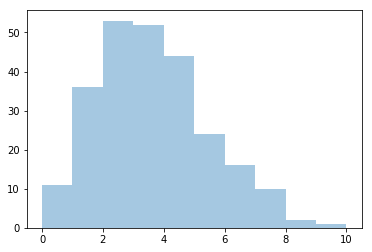

In [45]:
combiened_data = list(zip(x,y))
combiened_data = pd.DataFrame(combiened_data)
sns.distplot(x, kde=False, bins=10)

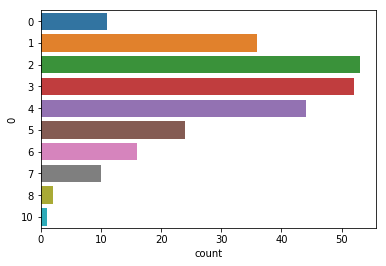

In [46]:
sns.countplot(y=combiened_data[0], data=combiened_data)

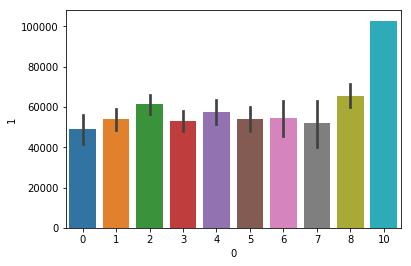

In [47]:
sns.barplot(x=combiened_data[0], y=combiened_data[1], data=combiened_data)

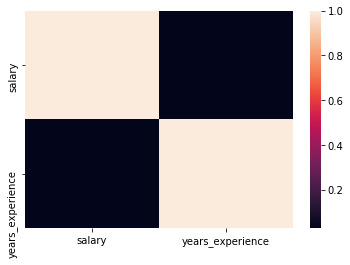

In [48]:
sns.heatmap(data_from_csv.iloc[: , 1:].corr())

In [49]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=1/3, random_state=0)

In [50]:
from sklearn.linear_model import LinearRegression
LinReg = LinearRegression()
LinReg.fit(x_train.reshape(1, -1), y_train.reshape(1, -1))

/home/asad/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [54]:
y_pred = LinReg.predict(x_test.reshape(1, -1))

ValueError: shapes (1,83) and (166,166) not aligned: 83 (dim 1) != 166 (dim 0)

ValueError: Expected 2D array, got 1D array instead:
array=[ 6  3  0  4  5  3  4  4  2  4  1  3  2  3  2  5  3  3  5  1  4  3  6  1
  2  2  2  1  1  0  4  1  2  6  3  3  4  7  5  2  3  2  3  2  1  1  1  7
  1  4  1  2  2  6  3  4  1  6  8  2  4  2  2  4  3  2  7  4  5  1  1  3
  2  1  1  2  3  7  3  3  5  1  3  4  4  2  3  4  3  2  3  4  3  2  6  2
  3  3  4  1  5 10  4  6  5  3  5  4  1  4  2  2  0  4  2  2  6  8  3  5
  3  4  0  1  2  2  3  4  3  5  3  1  3  4  5  0  1  3  2  6  2  7  2  3
  3  0  3  4  4  2  7  3  2  4  5  3  2  5  1  7  0  4  2  6  3  3].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

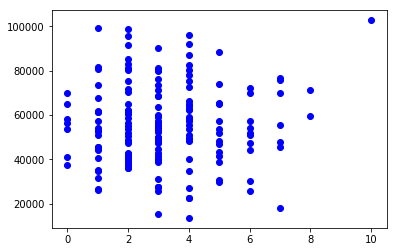

In [55]:
plt.scatter(x_train, y_train, color="blue")
plt.plot(x_train, LinReg.predict(x_train), color = "red")
plt.title("salary by experience")
plt.xlabel("years of exp")
plt.ylabel("salary")
plt.show()

In [ ]:
from sklearn import metrics
print("MAE ", metrics.mean_absolute_error(y_test, y_pred))
print("MSE ", metrics.mean_squared_error(y_test, y_pred))
print("RMSE ", np.sqrt(metrics.mean_absolute_error(y_test, y_pred)))